# Математическая статистика
## Практическое задание 3

В данном задании рассматриваются свойства условного математического ожидания. В частности, рассматривается модель смеси гауссовских распределений.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 1 балл
* Задача 3 - 2 балла
* Задача 4 - 7 баллов
* Задача 5<font size="5" color="red">\*</font> - 10 баллов

In [3]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kde import KDEUnivariate

%matplotlib inline

**Задача 1.** На вероятностном пространстве $\left(\mathbb{R}_+, \mathcal{B}(\mathbb{R}_+), \mathsf{P}\right)$, где $\mathsf{P}$ --- экспоненциальное распределение с параметром $\lambda$, задана случайная величина $\xi$ по правилу $\xi(\omega) = \omega$. Cигма-алгебра $\mathcal{G}$ порождена счетной системой событий $\{B_n\}_{n\geq1},$ где $B_n = \{n-1\leq \omega<n\}.$. Для $\omega \in [0, 5]$ постройте графики 
* плотности распределения $\mathsf{P}$ для $\lambda \in \{1, 3, 10\}$
* $\xi$ и $\mathsf{E}(\xi | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$
* $\xi^2$ и $\mathsf{E}(\xi^2 | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$

Используйте приведенный ниже шаблон. Одному и тому же значению $\lambda$ во всех графиках должен соответствовать один и тот же цвет.

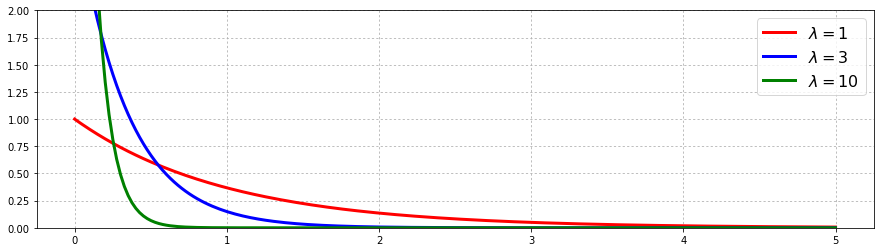

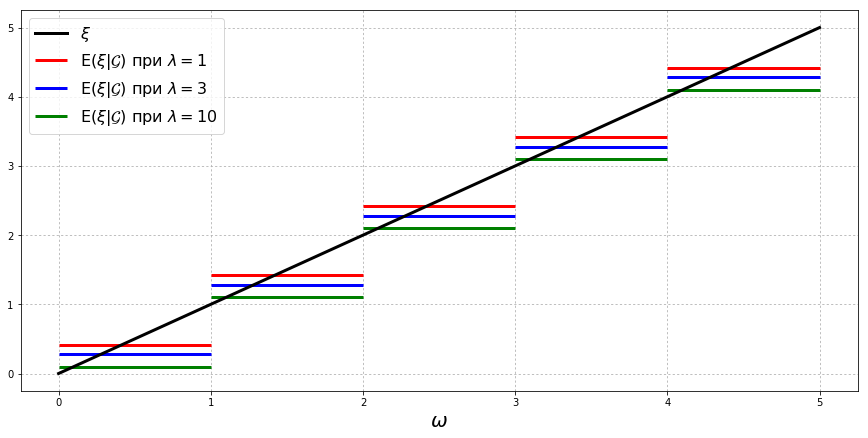

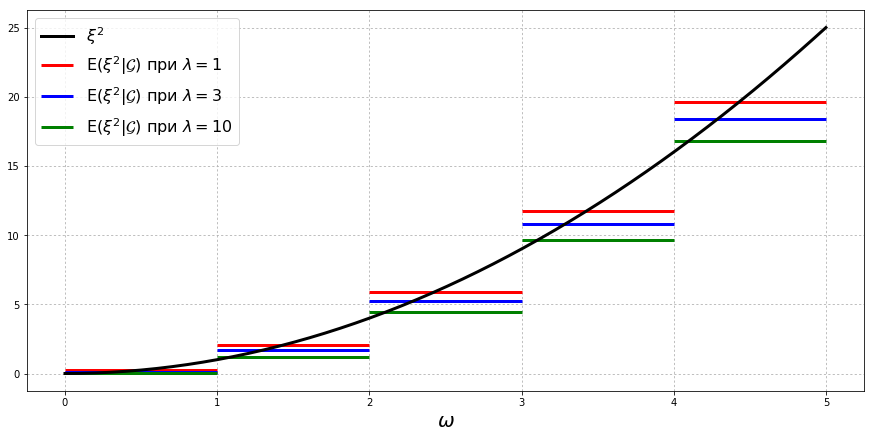

In [4]:
# График 1
plt.figure(figsize=(15, 4))
colors = ["red","blue","green"]
lambda_ = [1,3,10] 
grid = np.linspace(0,5,200)
for i in [0,1,2]:
    plt.plot(grid, sps.expon(scale = 1/lambda_[i]).pdf(grid), lw=3, color=colors[i], label='$\\lambda={}$'.format(lambda_[i]))
plt.legend(fontsize=16)
plt.ylim((0, 2))
plt.grid(ls=':')

#График 2
plt.figure(figsize=(15, 7))
plt.plot(grid, grid, lw=3, color = "black", label='$\\xi$')
for l in [0,1,2]:
    k = lambda_[l]
    for i in [0,1,2,3,4]:  # события из сигма-алгебры
        plt.hlines(xmin = i, xmax = i+1, y = (k*i+1-np.exp(-k)*(k*i+k+1))/(k*(1 - np.exp(-k))), color=colors[l], lw=3,
                   label=('$\\mathsf{E}(\\xi|\\mathcal{G})$ при $\\lambda = ' + str(k) + '$') if i == 0 else '')
plt.xlabel('$\\omega$', fontsize=20)
plt.legend(fontsize=16)
plt.grid(ls=':')

# График 3 для \xi^2 аналогичен графику 2
plt.figure(figsize=(15, 7))
plt.plot(grid, grid ** 2, lw=3, color = "black", label='$\\xi^2$')
for l in [0,1,2]:
    k = lambda_[l]
    for i in [0,1,2,3,4]:  # события из сигма-алгебры
        plt.hlines(xmin = i, xmax = i+1, y = ((k*i)**2+2*k*i+2 - np.exp(-k)*((k*(i+1))**2+2*(k*(i+1))+2))/
                   (k**2 *(1 - np.exp(-k))), color=colors[l], lw=3,
                   label=('$\\mathsf{E}(\\xi^2|\\mathcal{G})$ при $\\lambda = ' + str(k) + '$') if i == 0 else '')
plt.xlabel('$\\omega$', fontsize=20)
plt.legend(fontsize=16)
plt.grid(ls=':')

**Вывод:**
Пользуясь формулой $$\mathbb{E}(\xi|\mathcal{G}) = \sum\limits_{n \in N} \frac{\mathbb{E}(\xi I_{D_n})}{P(D_n)}I_{D_n}$$ мы вычислили условные мат.ожидания и рассмотрели их строения (по сути усредняет величину на промежутке). УМО также дает нам представление о первоначальном распределении.

**Задача 2.** 
Пусть $\xi = (\xi_1, \xi_2) \sim \mathcal{N}(a, \Sigma)$, где $a=0$ и $\Sigma = \begin{pmatrix}10 & 8 \\ 8 & 10\end{pmatrix}$. Для $y \in \{-3, 0, 1, 5\}$ постройте графики условной плотности $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right)$.

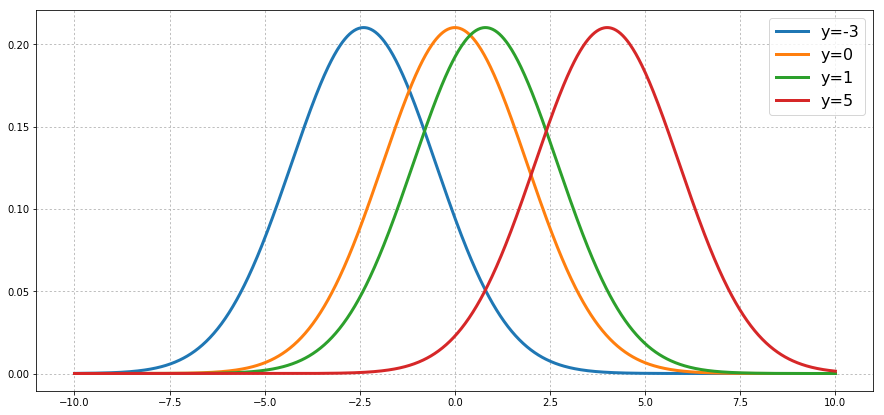

In [5]:
plt.figure(figsize = (15,7))
ys = [-3, 0, 1, 5]
grid = np.linspace(-10,10,1000)
def f(x1,x2):
    return 1/(0.6 * np.sqrt(np.pi*20))*np.exp((-1/7.2)*(x1**2 + x2**2 - 1.6*x1*x2) + (x2**2)/20)
for i in [0,1,2,3]:
    def f1(x):
        return f(x,ys[i])
    plt.plot(grid,f1(grid),lw=3,label="y="+str(ys[i]))
plt.legend(fontsize=16)
plt.grid(ls=":")
plt.show()


**Вывод:**
Используя стандартный метод нахождения условной плотности(нахождение совместного распределения,...), мы нашли и отбразили условную плотность одной компоненты двумерного гауссовского вектора относительно другой. Также стало известно, что такая величина тоже нормальна. 

**Задача 3.**
Имеется множество серверов, которые периодически выходят из строя. 
Обозначим $\xi_i$ время между $i$-м моментом выхода из строя сервера и $(i+1)$-м.
Известно, что величины $\xi_i$ независимы в совокупности и имеют экспоненциальное распределение с параметром $\lambda$.

Обозначим $N_t$ --- количество серверов, которые вышли из строя к моменту времени $t$ (в начальный момент времени $N_0 = 0$).
В курсе случайных процессов будет доказано, что для любых $s < t$ величина $N_t - N_s \sim Pois(\lambda (t - s))$ и независима с $N_s$.
При этом $N_t$ как функция от $t$ будет называться пуассоновским процессом интенсивности $\lambda$.

Вам нужно знать, сколько серверов нужно докупить к моменту времени $t$ взамен вышедших из строя.
В момент времени $s$ предсказанием количества серверов, вышедших из строя к моменту времени $t$, будем считать величину $\mathsf{E}( N_t | N_s)$.

Сгенерируйте выборку случайных величин $\xi_i$ для $\lambda = 1/4$ в количестве, чтобы их сумма была больше 100.
Для $t=100$ постройте графики зависимости величины $\mathsf{E}( N_t | N_s)$ от $s$ в предополжении, что условное математическое ожидание было посчитано при значении $\lambda \in \{1/10, 1/4, 1/2, 1\}$. Нарисуйте также на графике горизонтальную прямую уровня $N_{100}$.

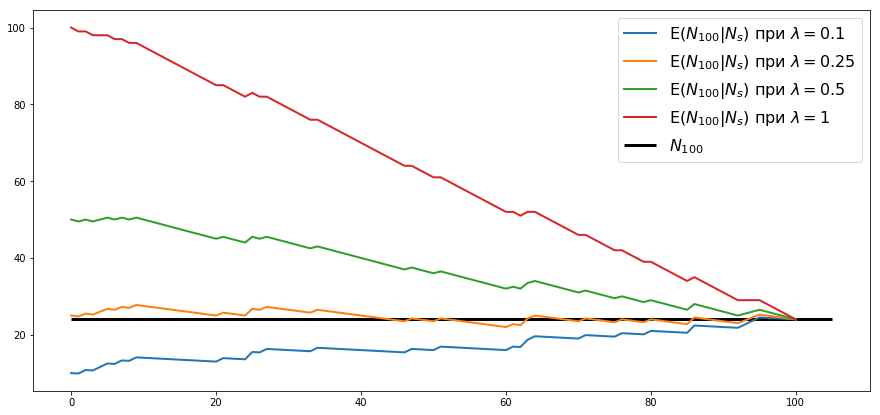

In [6]:
sum = 0
sample = []
while(sum<100):
    x = sps.expon(scale = 4).rvs(1)
    sum += x
    sample.append(x[0])
sample = np.array(sample)
cum = sample.cumsum()
def E(lambd,t,s):
    Ns = cum[cum<=s].size
    return lambd*(t-s)+Ns
lambds = [0.1,0.25,0.5,1]
plt.figure(figsize=(15,7))
grid = np.arange(0,101)
for i in [0,1,2,3]:
    values = []
    for y in grid:
        values.append(E(lambds[i],100,y))
    plt.plot(grid,values,lw=2,label = "$\mathsf{E}( N_{100} | N_s)$ при $\\lambda=$"+str(lambds[i]))
plt.hlines(xmin = 0, xmax = 105, y = sample.size - 1, lw=3, color="black", label=('$N_{100}$'))
plt.legend(fontsize = 16)
plt.show()

**Вывод:** 
Для того, чтобы точнее предсказывать поломки, нужно подобрать "удачный" параметр $\lambda$. Такой вывод можно сделать, так одна из кривых находится достаточно близко к прямой уровня $N_{100}$.

**Задача 4.** 
Рассмотрим модель смеси многомерных гауссовских распределений, то есть распределение, имеющее плотность $p(x) = \sum\limits_{k=1}^K p_k(x) \mathsf{P}(T = k),$ где $T$ --- случайная величина, принимающая значения $\{1, ..., K\}$ и имеющая смысл номера компоненты смеси, а $p_k(x)$ --- плотность распределения $N(a_k, \Sigma_k)$.


Загрузите датасет "Ирисы Фишера", используя следующий код.

In [7]:
from sklearn.datasets import load_iris
data = load_iris()
sample = data['data']  # выборка
targ = data['target']

В предположении, что каждый класс имеет гауссовское распределение, оцените его параметры. Используйте для этого функции `numpy.mean` и `numpy.cov`. Проверьте, что матрица ковариаций получилась правильной --- возможно, придется предварительно поменять порядок осей (транспонировать). Напечатайте полученные оценки.

In [8]:
samples = ([[],[],[]])
a=[[],[],[]]
cov=[[],[],[]]
for i in np.arange(0,150):
    samples[targ[i]].append(list(sample[i]))
samples=np.array(samples)
for i in [0,1,2]:
    a[i]=samples[i].mean(axis=0)
    cov[i] = np.cov(samples[i].transpose())
    print("{} класс".format(i+1)+"\nОценка a\n",a[i])
    print("Матрица ковариаций\n",cov[i])

1 класс
Оценка a
 [ 5.006  3.418  1.464  0.244]
Матрица ковариаций
 [[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]
2 класс
Оценка a
 [ 5.936  2.77   4.26   1.326]
Матрица ковариаций
 [[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]
3 класс
Оценка a
 [ 6.588  2.974  5.552  2.026]
Матрица ковариаций
 [[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]


Нарисуйте график плотности (тепловую карту) в проекции на первые две координаты и нанесите на график точки выборки. При выполнении задания полезно вспомнить решение части 3 задачи 1 задания 1. Используйте шаблон ниже.

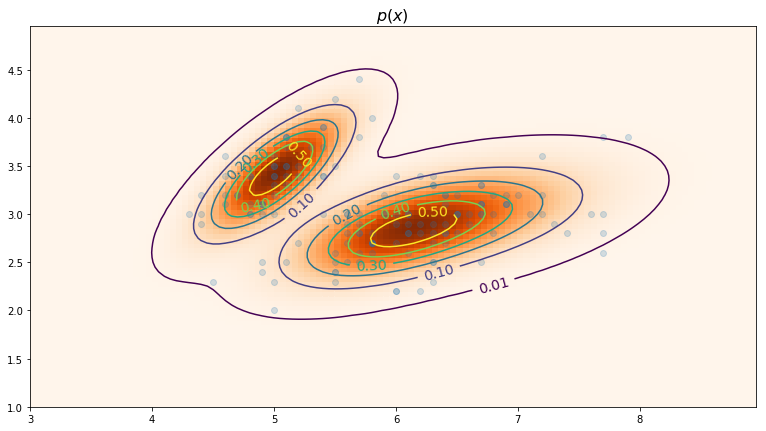

In [9]:
I = np.array([0, 1])  # это можно передавать в качестве индексов
grid = np.mgrid[3:9:0.05, 1:5:0.05]
def getDens(x,y,s,k):
    f=0
    for i in [0,1,2]:
        f += 1/3*sps.multivariate_normal.pdf((grid[0, x, y], grid[1, x, y]), mean = [a[i][s],a[i][k]],
                                             cov = [[cov[i][s][s],cov[i][s][k]],[cov[i][s][k],cov[i][k][k]]])
    return f                                   
density = np.array([[getDens(i,j,0,1)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(sample[:,0],sample[:,1], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title("$p(x)$",fontsize=16)
plt.show()

Вычислите условное математическое ожидание $\mathsf{E}( X | I\{T \not= k\} = 1)$ для всех $k = 1,2,3$, где $X$ --- случайный вектор, имеющий распределение смеси.
Постройте графики условной плотности $p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right)$ в проекции на первые две координаты. Подберите хорошие значения линий уровня.

In [10]:
print("E(X|I{T!=1}=1)=",(np.append(samples[1],samples[2],axis=0)).mean(axis=0))
print("E(X|I{T!=2}=1)=",(np.append(samples[0],samples[2],axis=0)).mean(axis=0))
print("E(X|I{T!=3}=1)=",(np.append(samples[0],samples[1],axis=0)).mean(axis=0))

E(X|I{T!=1}=1)= [ 6.262  2.872  4.906  1.676]
E(X|I{T!=2}=1)= [ 5.797  3.196  3.508  1.135]
E(X|I{T!=3}=1)= [ 5.471  3.094  2.862  0.785]


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


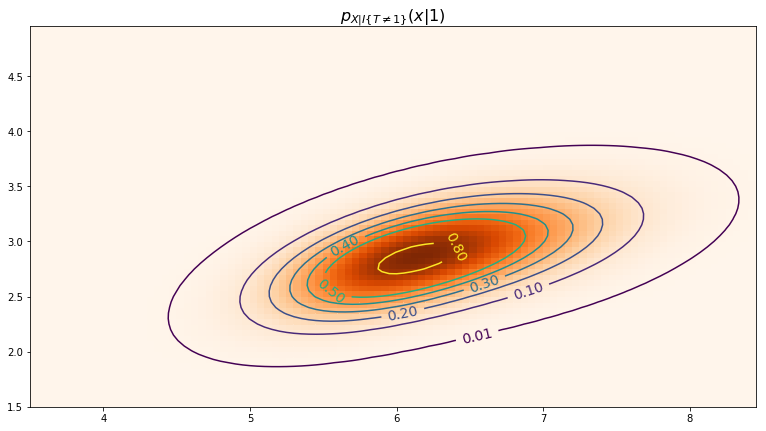

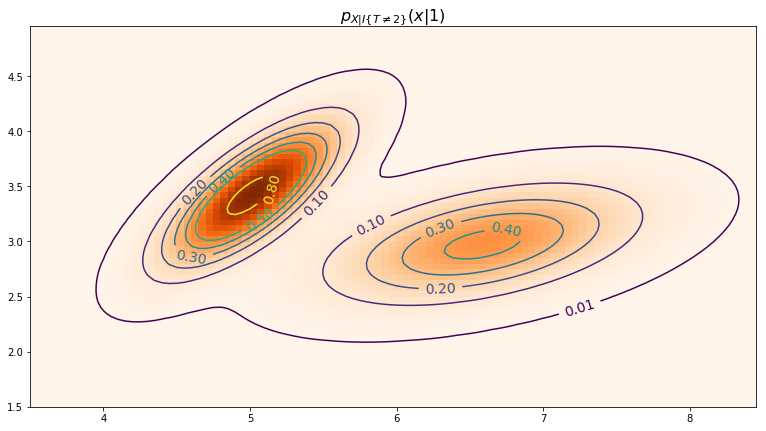

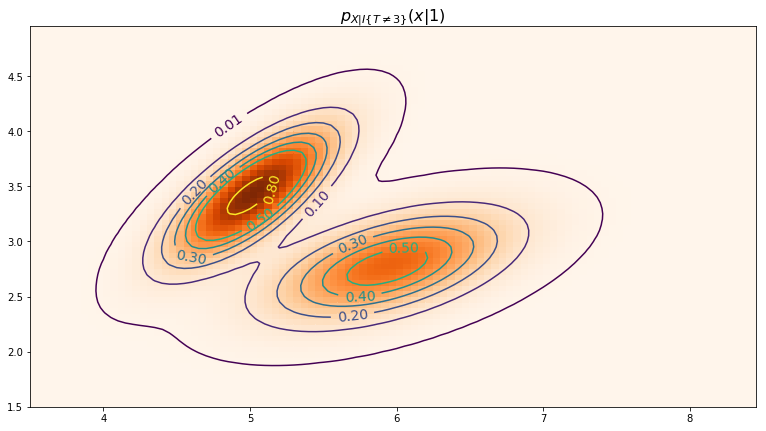

In [11]:
grid = np.mgrid[3.5:8.5:0.05, 1.5:5:0.05]
def getDens1(x,y,s,k,l):
    f=0
    for i in [0,1,2]:
        if i!=l:
            f += (1/2)*sps.multivariate_normal.pdf((grid[0, x, y], grid[1, x, y]), mean = [a[i][s],a[i][k]],
                    cov = [[cov[i][s][s],cov[i][s][k]],[cov[i][s][k],cov[i][k][k]]])
    return f                                   
density = np.array([[getDens1(i,j,0,1,0)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title('$p_{X|I\\{T \\neq 1\\}}\\left(x \\left| 1\\right.\\right)$', fontsize=16)
plt.show()

density = np.array([[getDens1(i,j,0,1,1)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title('$p_{X|I\\{T \\neq 2\\}}\\left(x \\left| 1\\right.\\right)$', fontsize=16)
plt.show()

density = np.array([[getDens1(i,j,0,1,2)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.title('$p_{X|I\\{T \\neq 3\\}}\\left(x \\left| 1\\right.\\right)$', fontsize=16)
plt.show()

Классифицируйте все пространство по принципу $k = \text{arg}\max\limits_k p_{X|I\{T = k\}}\left(x \left| 1\right.\right)$.
Посчитайте долю ошибок на выборке.
Нарисуйте классификацию всего пространства в проекции на пары координат (0, 1), (1, 3) и (2, 3), где закрасьте разными цветами области, которые образовались в результате классификации.

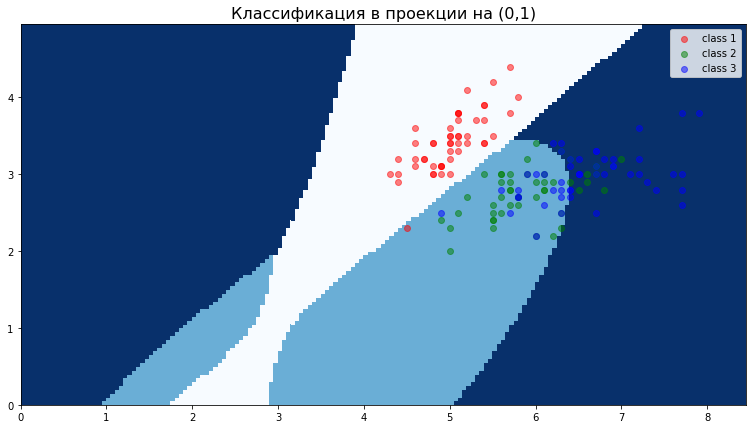

In [12]:
grid = np.mgrid[0:8.5:0.05, 0:5:0.05]
def getClass(x,y,s,k):
    ps=[]
    for i in [0,1,2]:
            ps.append(sps.multivariate_normal.pdf((grid[0, x, y], grid[1, x, y]), mean = [a[i][s],a[i][k]],
                    cov = [[cov[i][s][s],cov[i][s][k]],[cov[i][s][k],cov[i][k][k]]]))
    ps=np.array(ps)
    return np.argmax(ps)
density = np.array([[getClass(i,j,0,1)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Blues')
plt.scatter(samples[0][:,0],samples[0][:,1], alpha=0.5, color='red',label="class 1")
plt.scatter(samples[1][:,0],samples[1][:,1], alpha=0.5, color='green',label="class 2")
plt.scatter(samples[2][:,0],samples[2][:,1], alpha=0.5, color='blue',label="class 3")
plt.title("Классификация в проекции на (0,1)",fontsize=16)
plt.legend()
plt.show()

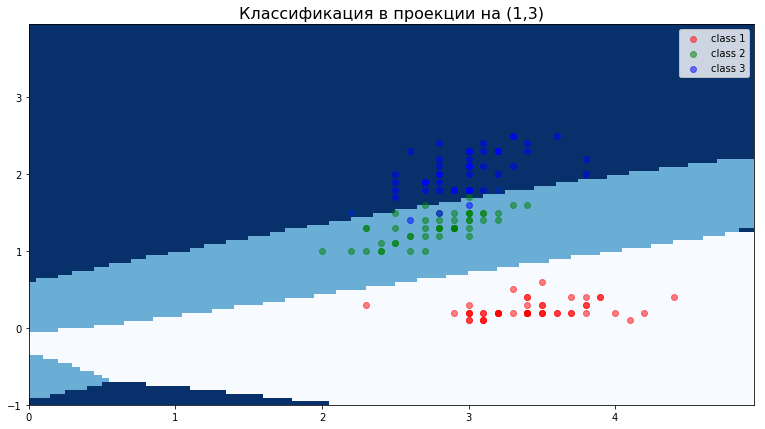

In [13]:
grid = np.mgrid[0:5:0.05, -1:4:0.05]
density = np.array([[getClass(i,j,1,3)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Blues')
plt.scatter(samples[0][:,1],samples[0][:,3], alpha=0.5, color='red',label="class 1")
plt.scatter(samples[1][:,1],samples[1][:,3], alpha=0.5, color='green',label="class 2")
plt.scatter(samples[2][:,1],samples[2][:,3], alpha=0.5, color='blue',label="class 3")
plt.title("Классификация в проекции на (1,3)",fontsize=16)
plt.legend()
plt.show()

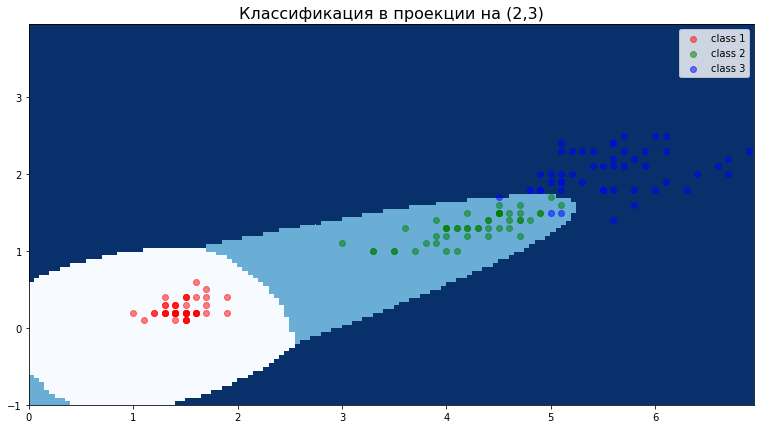

In [14]:
grid = np.mgrid[0:7:0.05, -1:4:0.05]
density = np.array([[getClass(i,j,2,3)  for j in range(grid[0].shape[1])]
                                    for i in range(grid[0].shape[0])]) 
plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Blues')
plt.scatter(samples[0][:,2],samples[0][:,3], alpha=0.5, color='red',label="class 1")
plt.scatter(samples[1][:,2],samples[1][:,3], alpha=0.5, color='green',label="class 2")
plt.scatter(samples[2][:,2],samples[2][:,3], alpha=0.5, color='blue',label="class 3")
plt.title("Классификация в проекции на (2,3)",fontsize=16)
plt.legend()
plt.show()

**Вывод:** ...

**Задача 5<font size="5" color="red">\*</font>.** В предыдущей задача информация о принадлежности наблюдения конкретной компоненте смеси была известна заранее. Как выть в случае, если такой информации нет? Задача оценки параметров распределения смеси может быть решена с помощью иттерационного EM-алгоритма.

Опишите, как работает EM-алгоритм (это обязательное условие, при котором эта задача будет проверяться). Затем примените EM-алгоритм к Ирисам Фишера и к некоторым искусственно сгенерированным датасетам. Исследуйте, как результат зависит от параметров алгоритма. Сделайте вывод.

*Разобраться в EM-алгоритме помогут:*

https://basegroup.ru/community/articles/em

http://www.machinelearning.ru/wiki/index.php?title=%D0%95%D0%9C-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC

https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

Bishop, C.M. Pattern Recognition and Machine Learning, глава 9.

*Реализация EM-алгоритма для смеси гауссовских распределений:*

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture